In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import pdb
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn import linear_model
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

In [2]:
users=pd.read_csv("users.csv")
movies=pd.read_csv("movies.tsv", sep="\t")
ratings=pd.read_csv("ratings.csv")
predict=pd.read_csv("predict.csv")
allData=pd.read_csv("allData.tsv", sep="\t")

In [3]:
allData.head()

,userID,age,gender,movieID,name,year,genre1,genre2,genre3,rating
0,747,1,F,1193,One Flew Over the Cuckoo's Nest,1975,Drama,NaN,NaN,5
1,747,1,F,661,James and the Giant Peach,1996,Animation,Children's,Musical,3
2,747,1,F,2804,"Christmas Story, A",1983,Comedy,Drama,NaN,5
3,747,1,F,919,"Wizard of Oz, The",1939,Adventure,Children's,Drama,4
4,747,1,F,2791,Airplane!,1980,Comedy,NaN,NaN,4


In [5]:
movies.head()

,movieID,name,year,genre1,genre2,genre3
0,1,Toy Story,1995,Animation,Children's,Comedy
1,2,Jumanji,1995,Adventure,Children's,Fantasy
2,3,Grumpier Old Men,1995,Comedy,Romance,NaN
3,4,Waiting to Exhale,1995,Comedy,Drama,NaN
4,5,Father of the Bride Part II,1995,Comedy,NaN,NaN


In [6]:
users.head()

,userID,age,gender
0,4,25,M
1,5,56,M
2,6,50,M
3,15,45,M
4,17,25,F


In [7]:
avgratings=pd.DataFrame(allData.groupby("movieID", as_index=False).agg({"rating":"mean"}))
avgratings.rename(index=str, columns={'movieID':'movieID','rating':'avg_rating'}, inplace=True)
avgratings.head()

,movieID,avg_rating
0,1,4.147826
1,2,3.238806
2,3,2.872340
3,4,2.631579
4,5,3.111111


In [8]:
stdevratings=allData.groupby(["movieID"]).agg({"rating":"std"})
stdevratings.head()

,rating
movieID,
1,0.819108
2,1.074350
3,0.969469
4,1.164785
5,1.050031


In [9]:
ratings_count=pd.DataFrame(allData.groupby('movieID',  as_index=False)['rating'].count())
ratings_count.rename(index=str, columns={'movieID':'movieID','rating':'count'}, inplace=True)
ratings_count.head()

,movieID,count
0,1,115
1,2,67
2,3,47
3,4,19
4,5,27


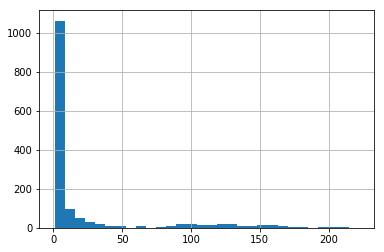

In [10]:
ratings_count['count'].hist(bins=30)

In [11]:
moviesfin=pd.merge(ratings_count, avgratings, on='movieID')
moviesfin.head()

,movieID,count,avg_rating
0,1,115,4.147826
1,2,67,3.238806
2,3,47,2.872340
3,4,19,2.631579
4,5,27,3.111111


In [16]:
matrix_A=pd.DataFrame(allData.pivot_table(index="movieID", columns="userID", values='rating'))
matrix_A

userID,4,5,6,15,17,18,19,22,23,24,...,6008,6009,6021,6022,6024,6025,6027,6029,6030,6038
movieID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
6,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20,n_jobs=-1)
model_knn.fit(matrix_A)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)